In [257]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import pyodbc
import pandas_access as pa
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score,classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
import tensorflow as tf
import imblearn
from imblearn.over_sampling import BorderlineSMOTE,ADASYN,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import seaborn as sns
from collections import Counter

In [2]:
dataset_close=pd.read_csv('data\hospital_closure\hospital_closure.csv')

In [3]:
dataset_close['year_close_combined'].value_counts(dropna=False).sort_index()

2002     1
2003     1
2004     1
2005     1
2006     3
2007    13
2008    16
2009    17
2010    12
2011    13
2012    25
2013    23
2014    24
2015    18
2016    10
2017     7
Name: year_close_combined, dtype: int64

In [4]:
MDB = 'data\hospital_compare\Copy of hc_dec2016.mdb'
MDB2='data\hospital_compare\Copy of HospitalMay2015.mdb'
DRV = '{Microsoft Access Driver (*.mdb, *.accdb)}'
PWD = 'pw'

con = pyodbc.connect('DRIVER={};DBQ={};PWD={}'.format(DRV,MDB,PWD))
cur = con.cursor()

list(cur.tables())

[('data\\hospital_compare\\Copy of hc_dec2016.mdb', None, 'MSysAccessObjects', 'SYSTEM TABLE', None),
 ('data\\hospital_compare\\Copy of hc_dec2016.mdb', None, 'MSysAccessXML', 'SYSTEM TABLE', None),
 ('data\\hospital_compare\\Copy of hc_dec2016.mdb', None, 'MSysACEs', 'SYSTEM TABLE', None),
 ('data\\hospital_compare\\Copy of hc_dec2016.mdb', None, 'MSysIMEXColumns', 'SYSTEM TABLE', None),
 ('data\\hospital_compare\\Copy of hc_dec2016.mdb', None, 'MSysIMEXSpecs', 'SYSTEM TABLE', None),
 ('data\\hospital_compare\\Copy of hc_dec2016.mdb', None, 'MSysNameMap', 'SYSTEM TABLE', None),
 ('data\\hospital_compare\\Copy of hc_dec2016.mdb', None, 'MSysNavPaneGroupCategories', 'SYSTEM TABLE', None),
 ('data\\hospital_compare\\Copy of hc_dec2016.mdb', None, 'MSysNavPaneGroups', 'SYSTEM TABLE', None),
 ('data\\hospital_compare\\Copy of hc_dec2016.mdb', None, 'MSysNavPaneGroupToObjects', 'SYSTEM TABLE', None),
 ('data\\hospital_compare\\Copy of hc_dec2016.mdb', None, 'MSysNavPaneObjectIDs', 'SYSTEM 

In [5]:
table_name = '[Medicare Hospital Spending by Claim]'
table_name2='HQI_HOSP_PaymentAndValueOfCare'
table_name3='HQI_HOSP'
# define query
query = "SELECT * FROM {}".format(table_name)
query2 = "SELECT * FROM {}".format(table_name2)
query3 = "SELECT * FROM {}.COLUMNS".format(table_name3)
rows = cur.execute(query).fetchall()

In [6]:
for row in cur.columns(table='MSysRelationships'):
    print(row.column_name)

In [7]:
rows3

NameError: name 'rows3' is not defined

In [8]:
row2 = cur.execute(query2).fetchall()
row2=np.array(row2)
dataset0=pd.DataFrame(data=row2[:,[0,4,5,6,7,8,9,12,13]],columns=['1','2','3','4','5','6','7','8','9'])


In [9]:
dataset0

,1,2,3,4,5,6,7,8,9
0,010001,No Different than the National Average Payment,707,"$21,804","$20,744","$22,932",None,Average mortality and average payment,None
1,010001,No Different than the National Average Payment,754,"$15,659","$14,884","$16,446",None,Average mortality and average payment,None
2,010001,No Different than the National Average Payment,404,"$15,089","$14,133","$16,018",None,Average mortality and average payment,None
3,010005,No Different than the National Average Payment,53,"$23,171","$20,404","$26,226",None,Average mortality and average payment,None
4,010005,No Different than the National Average Payment,347,"$16,376","$15,237","$17,547",None,Worse mortality and average payment,None
...,...,...,...,...,...,...,...,...,...
14449,670111,Not Available,Not Available,Not Available,Not Available,Not Available,19,Not Available,19
14450,670111,Not Available,Not Available,Not Available,Not Available,Not Available,19,Not Available,19
14451,670112,Not Available,Not Available,Not Available,Not Available,Not Available,5,Not Available,5
14452,670112,Not Available,Not Available,Not Available,Not Available,Not Available,5,Not Available,5


In [10]:
dataset0['2']=dataset0['2'].replace({'No Different than the National Average Payment':0,'Number of Cases Too Small':0,'Not Available':0,'Greater than the National Average Payment':1,'Less than the National Average Payment':2})

In [11]:
dataset0['4']=dataset0['4'].str.strip("$")
dataset0['4']=dataset0['4'].str.replace(',', '')
dataset0['5']=dataset0['5'].str.strip("$")
dataset0['5']=dataset0['5'].str.replace(',', '')
dataset0['6']=dataset0['6'].str.strip("$")
dataset0['6']=dataset0['6'].str.replace(',', '')

In [12]:
dataset0['3']=dataset0['3'].replace({'Not Available':np.nan})
dataset0['4']=dataset0['4'].replace({'Not Available':np.nan})
dataset0['5']=dataset0['5'].replace({'Not Available':np.nan})
dataset0['6']=dataset0['6'].replace({'Not Available':np.nan})

In [13]:
dataset0['6'].value_counts(dropna=False)

NaN      4574
16405       8
16775       7
16896       6
16608       6
         ... 
22231       1
25337       1
23883       1
15223       1
18898       1
Name: 6, Length: 6320, dtype: int64

In [14]:
arr=np.array(rows)


In [15]:
dataset4=pd.DataFrame(arr[:,[1,5,6,7,8,9,10]],columns=['id','1','2','3','4','5','6'])

In [16]:
dataset4

,id,1,2,3,4,5,6
0,010019,18,31,24,0.10%,0.16%,0.12%
1,010019,1062,1480,1540,6.01%,7.71%,7.52%
2,010019,917,948,816,5.19%,4.94%,3.98%
3,010019,172,154,122,0.97%,0.80%,0.60%
4,010019,2518,2634,2702,14.25%,13.72%,13.18%
...,...,...,...,...,...,...,...
69779,510046,1,2,2,0.00%,0.01%,0.01%
69780,510046,6,11,9,0.04%,0.06%,0.04%
69781,510046,485,644,552,2.81%,3.39%,2.69%
69782,510046,0,0,0,0.00%,0.00%,0.00%


In [17]:
dataset4['4']=dataset4['4'].str.strip("%").astype(float)/100
dataset4['5']=dataset4['5'].str.strip("%").astype(float)/100
dataset4['6']=dataset4['6'].str.strip("%").astype(float)/100


In [18]:
for col in dataset4:
    dataset4[col]=pd.to_numeric(dataset4[col])
sub_ds1=dataset_close[dataset_close['year_close_combined']==2015]
sub_ds2=dataset_close[dataset_close['year_close_combined']==2016]
sub_ds3=dataset_close[dataset_close['year_close_combined']==2017]
sub_ds=pd.concat([sub_ds1,sub_ds2,sub_ds3])
dataset4['Closure']=dataset4.id.apply(lambda x:1 if x in np.array(sub_ds['id']) else 0)

In [19]:
dataset4

,id,1,2,3,4,5,6,Closure
0,10019,18,31,24,0.0010,0.0016,0.0012,0
1,10019,1062,1480,1540,0.0601,0.0771,0.0752,0
2,10019,917,948,816,0.0519,0.0494,0.0398,0
3,10019,172,154,122,0.0097,0.0080,0.0060,0
4,10019,2518,2634,2702,0.1425,0.1372,0.1318,0
...,...,...,...,...,...,...,...,...
69779,510046,1,2,2,0.0000,0.0001,0.0001,0
69780,510046,6,11,9,0.0004,0.0006,0.0004,0
69781,510046,485,644,552,0.0281,0.0339,0.0269,0
69782,510046,0,0,0,0.0000,0.0000,0.0000,0


In [20]:
dataset4=dataset4.to_numpy().reshape(3172,8*22)

In [21]:
arr1=[i*8 for i in range(22)]
arr2=[i*8+7 for i in range(22)]
arr=np.array([arr1,arr2]).flatten()
arr.sort()

In [22]:
dataset4=np.delete(dataset4,arr[:-1],axis=1)
dataset4.shape

(3172, 133)

In [23]:
dataset1=pd.read_csv('data\hospital_compare\Copy of HQI_HOSP_TimelyEffectiveCare.csv')

In [24]:
dataset1

,Provider ID,Hospital Name,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,Heart Attack or Chest Pain,AMI_10,Statin at Discharge,98,607,NaN,07/01/2013,06/30/2014
1,010001,SOUTHEAST ALABAMA MEDICAL CENTER,Heart Attack or Chest Pain,AMI_2,Aspirin prescribed at discharge,99,639,NaN,07/01/2013,06/30/2014
2,010001,SOUTHEAST ALABAMA MEDICAL CENTER,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,Not Available,0,7,07/01/2013,06/30/2014
3,010001,SOUTHEAST ALABAMA MEDICAL CENTER,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,94,50,NaN,07/01/2013,06/30/2014
4,010001,SOUTHEAST ALABAMA MEDICAL CENTER,Emergency Department,ED_1b,ED1,282,475,2,07/01/2013,06/30/2014
...,...,...,...,...,...,...,...,...,...,...
217710,670092,WALNUT HILL MEDICAL CENTER,Blood Clot Prevention and Treatment,VTE_2,ICU venous thromboembolism prophylaxis,Not Available,Not Available,5,07/01/2013,06/30/2014
217711,670092,WALNUT HILL MEDICAL CENTER,Blood Clot Prevention and Treatment,VTE_3,Anticoagulation overlap therapy,Not Available,Not Available,5,07/01/2013,06/30/2014
217712,670092,WALNUT HILL MEDICAL CENTER,Blood Clot Prevention and Treatment,VTE_4,Unfractionated heparin with dosages/platelet c...,Not Available,Not Available,5,07/01/2013,06/30/2014
217713,670092,WALNUT HILL MEDICAL CENTER,Blood Clot Prevention and Treatment,VTE_5,Warfarin therapy discharge instructions,Not Available,Not Available,5,07/01/2013,06/30/2014


In [25]:
dataset1['Provider ID'].value_counts()

360180    51
340001    51
330393    51
340085    51
210033    51
          ..
45090F    12
36003F    12
33024F    12
26007F    12
49006F    12
Name: Provider ID, Length: 4804, dtype: int64

In [26]:
dataset1=pd.DataFrame(dataset1,columns=['Provider ID','Score','Sample'])

In [27]:
dataset1.replace({'Not Available':np.nan})

,Provider ID,Score,Sample
0,010001,98,607
1,010001,99,639
2,010001,NaN,0
3,010001,94,50
4,010001,282,475
...,...,...,...
217710,670092,NaN,NaN
217711,670092,NaN,NaN
217712,670092,NaN,NaN
217713,670092,NaN,NaN


In [28]:
dataset2=pd.read_csv('data\hospital_compare\Copy of Medicare Hospital Spending by Claim.csv')

In [29]:
dataset2

,Hospital Name,Provider Number,Period,State,Claim Type,Avg Spending Per Episode (Hospital),Avg Spending Per Episode (State),Avg Spending Per Episode (Nation),Percent of Spending (Hospital),Percent of Spending (State),Percent of Spending (Nation),Measure Start Date,Measure End Date
0,SOUTHEAST ALABAMA MEDICAL CENTER,10001,1 to 3 days Prior to Index Hospital Admission,AL,Home Health Agency,$19,$16,$13,0.10%,0.09%,0.07%,1/1/2013,12/31/2013
1,SOUTHEAST ALABAMA MEDICAL CENTER,10001,1 to 3 days Prior to Index Hospital Admission,AL,Hospice,$0,$2,$1,0.00%,0.01%,0.00%,1/1/2013,12/31/2013
2,SOUTHEAST ALABAMA MEDICAL CENTER,10001,1 to 3 days Prior to Index Hospital Admission,AL,Inpatient,$5,$5,$5,0.03%,0.03%,0.02%,1/1/2013,12/31/2013
3,SOUTHEAST ALABAMA MEDICAL CENTER,10001,1 to 3 days Prior to Index Hospital Admission,AL,Outpatient,$138,$76,$113,0.72%,0.42%,0.58%,1/1/2013,12/31/2013
4,SOUTHEAST ALABAMA MEDICAL CENTER,10001,1 to 3 days Prior to Index Hospital Admission,AL,Skilled Nursing Facility,$1,$2,$2,0.01%,0.01%,0.01%,1/1/2013,12/31/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71055,SCOTT & WHITE HOSPITAL- COLLEGE STATION,670088,1 through 30 days After Discharge from Index H...,TX,Outpatient,$448,$667,$664,2.58%,3.18%,3.39%,1/1/2013,12/31/2013
71056,SCOTT & WHITE HOSPITAL- COLLEGE STATION,670088,1 through 30 days After Discharge from Index H...,TX,Skilled Nursing Facility,"$2,638","$2,729","$3,087",15.19%,13.00%,15.77%,1/1/2013,12/31/2013
71057,SCOTT & WHITE HOSPITAL- COLLEGE STATION,670088,1 through 30 days After Discharge from Index H...,TX,Durable Medical Equipment,$94,$124,$107,0.54%,0.59%,0.55%,1/1/2013,12/31/2013
71058,SCOTT & WHITE HOSPITAL- COLLEGE STATION,670088,1 through 30 days After Discharge from Index H...,TX,Carrier,$755,"$1,211","$1,078",4.35%,5.77%,5.51%,1/1/2013,12/31/2013


In [30]:
dataset2['Period'].value_counts()

During Index Hospital Admission                                    22610
1 to 3 days Prior to Index Hospital Admission                      22610
1 through 30 days After Discharge from Index Hospital Admission    22610
Complete Episode                                                    3230
Name: Period, dtype: int64

In [31]:
dataset2.drop(columns=['Hospital Name','Period','State','Claim Type','Measure Start Date','Measure End Date'],inplace=True)

In [32]:
dataset2['Percent of Spending (Hospital)']=dataset2['Percent of Spending (Hospital)'].str.strip("%").astype(float)/100
dataset2['Percent of Spending (State)']=dataset2['Percent of Spending (State)'].str.strip("%").astype(float)/100
dataset2['Percent of Spending (Nation)']=dataset2['Percent of Spending (Nation)'].str.strip("%").astype(float)/100

In [33]:
dataset2['Avg Spending Per Episode (Hospital)']=dataset2['Avg Spending Per Episode (Hospital)'].str.strip("$")
dataset2['Avg Spending Per Episode (Hospital)']=dataset2['Avg Spending Per Episode (Hospital)'].str.replace(',', '')

In [34]:
dataset2['Avg Spending Per Episode (State)']=dataset2['Avg Spending Per Episode (State)'].str.strip("$")
dataset2['Avg Spending Per Episode (State)']=dataset2['Avg Spending Per Episode (State)'].str.replace(',', '')

In [35]:
dataset2['Avg Spending Per Episode (Nation)']=dataset2['Avg Spending Per Episode (Nation)'].str.strip("$")
dataset2['Avg Spending Per Episode (Nation)']=dataset2['Avg Spending Per Episode (Nation)'].str.replace(',', '')

In [36]:
sub_ds1=dataset_close[dataset_close['year_close_combined']==2014]
sub_ds2=dataset_close[dataset_close['year_close_combined']==2015]
sub_ds3=dataset_close[dataset_close['year_close_combined']==2013]
sub_ds=pd.concat([sub_ds1,sub_ds2,sub_ds3])
dataset2=dataset2.rename(columns={'Provider Number':'id'})
dataset2['Closure']=dataset2.id.apply(lambda x:1 if x in np.array(sub_ds['id']) else 0)

In [37]:
dataset2[dataset2['Closure']==1]['id'].value_counts()

450497    22
200025    22
170010    22
260147    22
40042     22
420054    22
250084    22
450795    22
50435     22
450832    22
670002    22
450884    22
370051    22
180149    22
450005    22
190009    22
110183    22
450188    22
140026    22
450373    22
440174    22
100239    22
180117    22
220067    22
260116    22
Name: id, dtype: int64

In [38]:
for col in dataset2:
    dataset2[col]=pd.to_numeric(dataset2[col])

In [39]:
dataset3=dataset2.to_numpy().reshape(3230,8*22)

In [40]:
dataset3.shape

(3230, 176)

In [41]:
arr1=[i*8 for i in range(22)]
arr2=[i*8+7 for i in range(22)]
arr=np.array([arr1,arr2]).flatten()
arr.sort()
arr[:-1]

array([  0,   7,   8,  15,  16,  23,  24,  31,  32,  39,  40,  47,  48,
        55,  56,  63,  64,  71,  72,  79,  80,  87,  88,  95,  96, 103,
       104, 111, 112, 119, 120, 127, 128, 135, 136, 143, 144, 151, 152,
       159, 160, 167, 168])

In [42]:
dataset3=np.delete(dataset3,arr[:-1],axis=1)

In [43]:
dataset3.shape

(3230, 133)

In [44]:
dataset_=np.concatenate((dataset3,dataset4),axis=0)

In [185]:
dataset_.shape

(6402, 133)

In [186]:
train, test = train_test_split(dataset_, test_size=0.3)

In [187]:
X_train = train[:,:-1]
Y_train = train[:,-1].astype(int)
X_test  = test[:,:-1]
Y_test  = test[:,-1].astype(int)
X_train.shape, Y_train.shape,X_test.shape, Y_test.shape

((4481, 132), (4481,), (1921, 132), (1921,))

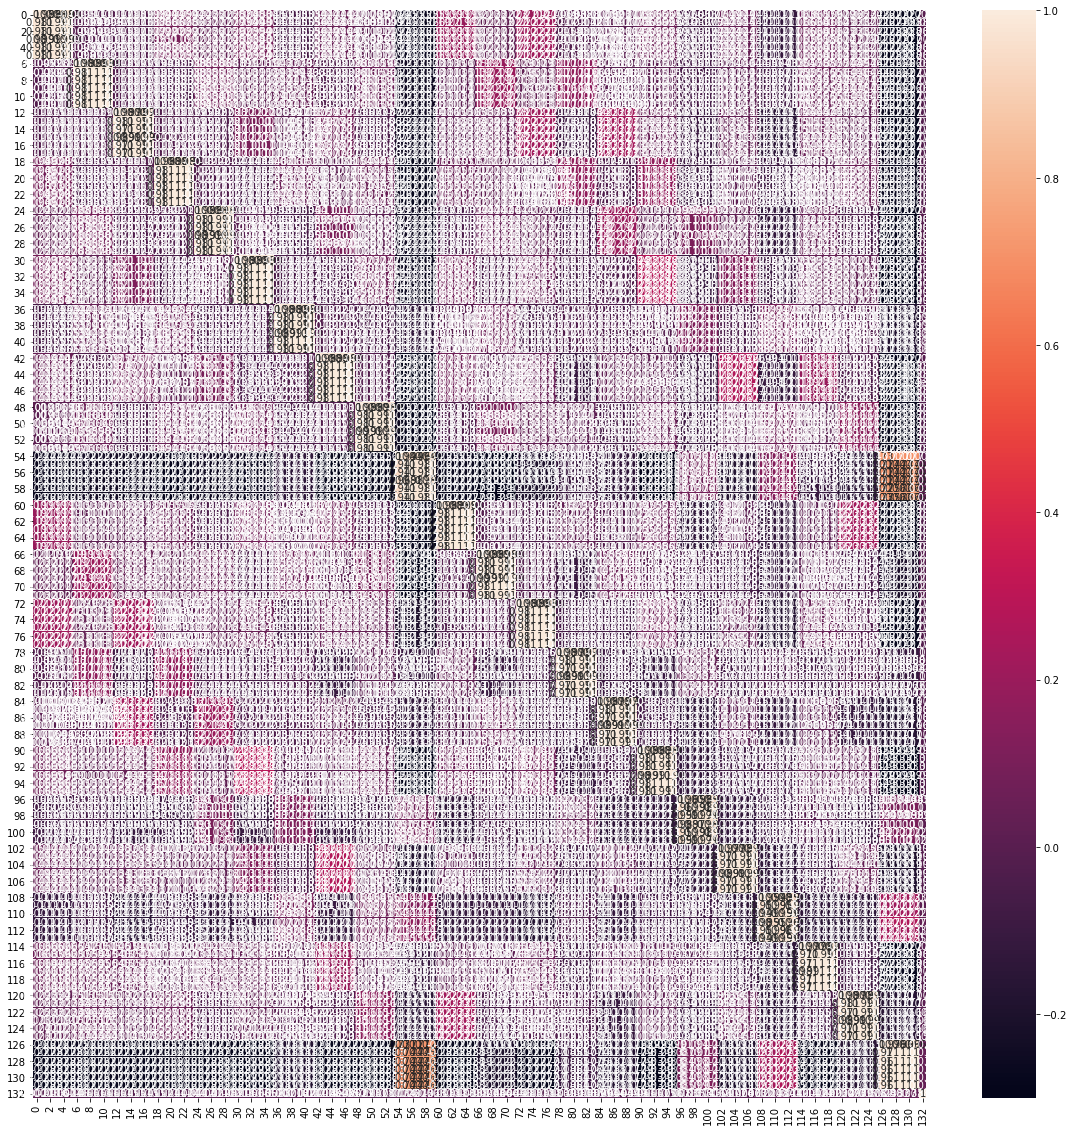

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.DataFrame(dataset_).corr(), annot=True)
plt.show()

In [93]:


# Separate class
class_0 = pd.DataFrame(dataset3[dataset3[:,-1] == 0])
class_1 = pd.DataFrame(dataset3[dataset3[:,-1] == 1])# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (3205, 133)
class 1: (25, 133)


In [178]:
data=pd.concat([class_0,class_1])
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [58]:
class_1

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,10.0,10.0,13.0,0.0005,0.0005,0.0007,13.0,1.0,1.0,0.0007,...,0.0702,0.0469,0.0551,19066.0,18489.0,19578.0,1.0000,1.0000,1.0000,1.0
1,9.0,13.0,13.0,0.0006,0.0006,0.0007,0.0,0.0,1.0,0.0000,...,0.0610,0.0593,0.0551,15059.0,20252.0,19578.0,1.0000,1.0000,1.0000,1.0
2,19.0,21.0,13.0,0.0009,0.0010,0.0007,0.0,2.0,1.0,0.0000,...,0.0592,0.0650,0.0551,20219.0,20088.0,19578.0,1.0000,1.0000,1.0000,1.0
3,2.0,12.0,13.0,0.0001,0.0006,0.0007,0.0,2.0,1.0,0.0000,...,0.0664,0.0564,0.0551,15446.0,18975.0,19578.0,1.0000,1.0000,1.0000,1.0
4,1.0,13.0,13.0,0.0000,0.0007,0.0007,0.0,0.0,1.0,0.0000,...,0.0555,0.0570,0.0551,17042.0,19646.0,19578.0,1.0000,1.0000,1.0000,1.0
5,2.0,7.0,13.0,0.0001,0.0004,0.0007,0.0,1.0,1.0,0.0000,...,0.0447,0.0448,0.0551,13580.0,19486.0,19578.0,1.0000,1.0000,1.0000,1.0
6,24.0,14.0,13.0,0.0016,0.0007,0.0007,0.0,1.0,1.0,0.0000,...,0.0437,0.0529,0.0551,15507.0,18503.0,19578.0,1.0000,1.0000,1.0000,1.0
7,14.0,14.0,13.0,0.0010,0.0007,0.0007,0.0,1.0,1.0,0.0000,...,0.0558,0.0529,0.0551,13677.0,18503.0,19578.0,1.0000,1.0000,1.0000,1.0
8,38.0,21.0,13.0,0.0028,0.0011,0.0007,0.0,1.0,1.0,0.0000,...,0.0485,0.0514,0.0551,13709.0,20134.0,19578.0,1.0000,1.0000,1.0000,1.0
9,55.0,11.0,13.0,0.0038,0.0006,0.0007,2.0,0.0,1.0,0.0002,...,0.0592,0.0422,0.0551,14595.0,18403.0,19578.0,1.0000,1.0000,1.0000,1.0


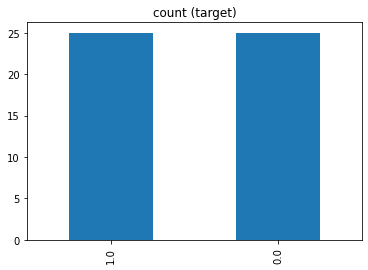

In [94]:
class_0_under = class_0.sample(25)

test_under = pd.concat([class_0_under, class_1], axis=0)

# plot the count after under-sampeling
test_under.iloc[:,-1].value_counts().plot(kind='bar', title='count (target)')

In [190]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1, random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(X_train, Y_train)


In [180]:
rus = RandomUnderSampler(sampling_strategy=0.1,random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(X_train, Y_train)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0.0: 3205, 1.0: 25})
Resample dataset shape Counter({0.0: 250, 1.0: 25})


In [102]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_sample(x, y)

In [192]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
7376785834
# fit target and predictor variable
x_smote , y_smote = smote.fit_sample(X_train, Y_train)

In [111]:
from imblearn.under_sampling import NearMiss 

nm = NearMiss() 

x_nm, y_nm = nm.fit_resample(x, y) 

In [258]:
over = SVMSMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
x_p, y_p = over.fit_resample(X_train, Y_train)

In [259]:
x_train1, y_train1 = x_p, y_p
scaler = StandardScaler()  

scaler.fit(x_train1)  
x_train1 = scaler.transform(x_train1)  

x_test1 = scaler.transform(X_test)


m = MLPClassifier(hidden_layer_sizes=(132,132))
m.fit(x_train1, y_train1)
predict_y = m.predict(x_test1)

print('ROCAUC score:',roc_auc_score(Y_test, predict_y))
print('Accuracy score:',accuracy_score(Y_test, predict_y))
print('F1 score:',f1_score(Y_test, predict_y))
print(classification_report(Y_test, predict_y))
confusion_matrix(Y_test, predict_y)

ROCAUC score: 0.49843014128728413
Accuracy score: 0.9916710046850599
F1 score: 0.0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1911
           1       0.00      0.00      0.00        10

    accuracy                           0.99      1921
   macro avg       0.50      0.50      0.50      1921
weighted avg       0.99      0.99      0.99      1921



array([[1905,    6],
       [  10,    0]], dtype=int64)

In [161]:
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train1, y_train1)

# predict
rfc_predict = rfc.predict(x_test1)# check performance
print('ROCAUC score:',roc_auc_score(y_test1, rfc_predict))
print('Accuracy score:',accuracy_score(y_test1, rfc_predict))
print('F1 score:',f1_score(y_test1, rfc_predict))
print(classification_report(y_test1, rfc_predict))
confusion_matrix(y_test1, rfc_predict)

ROCAUC score: 0.5515898083807116
Accuracy score: 0.4369482976040353
F1 score: 0.004459308807134894
              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61      3166
         1.0       0.00      0.67      0.00         6

    accuracy                           0.44      3172
   macro avg       0.50      0.55      0.31      3172
weighted avg       1.00      0.44      0.61      3172



array([[1382, 1784],
       [   2,    4]], dtype=int64)

In [47]:
logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = logreg.score(X_train, Y_train) * 100
acc_log_t = logreg.score(X_test, Y_test) * 100
print('training score:' +str(acc_log))
print('test score:' +str(acc_log_t))
confusion_matrix(Y_test, Y_pred)

training score:99.62062039723276
test score:99.11504424778761


C:\Users\zys\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


array([[1904,    6],
       [  11,    0]], dtype=int64)

In [48]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = random_forest.score(X_train, Y_train) * 100
acc_random_forest_t = random_forest.score(X_test, Y_test) * 100
print('training score:' +str(acc_random_forest))
print('test score:' +str(acc_random_forest_t))
confusion_matrix(Y_test, Y_pred)

training score:100.0
test score:99.42738157209786


array([[1910,    0],
       [  11,    0]], dtype=int64)

In [49]:
xgboost = XGBClassifier()
xgboost.fit(X_train, Y_train)
Y_pred = xgboost.predict(X_test)
xgboost.score(X_train, Y_train)
acc_xgboost = xgboost.score(X_train, Y_train) * 100
acc_xgboost_t = xgboost.score(X_test, Y_test) * 100
print('training score:' +str(acc_xgboost))
print('test score:' +str(acc_xgboost_t))
confusion_matrix(Y_test, Y_pred)

[14:42:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\zys\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


training score:100.0
test score:99.42738157209786


array([[1910,    0],
       [  11,    0]], dtype=int64)

In [153]:
svc = SVC(class_weight='balanced',probability= True)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, Y_train) * 100
acc_svc_t = svc.score(X_test, Y_test) * 100
print('training score:' +str(acc_svc))
print('test score:' +str(acc_svc_t))
print(classification_report(Y_test, Y_pred))
confusion_matrix(Y_test, Y_pred)

training score:80.807855389422
test score:80.32274856845393
              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1910
           1       0.02      0.55      0.03        11

    accuracy                           0.80      1921
   macro avg       0.51      0.68      0.46      1921
weighted avg       0.99      0.80      0.89      1921



array([[1537,  373],
       [   5,    6]], dtype=int64)

In [51]:
isolation_forest= IsolationForest(contamination=0.003715, behaviour='new')
X_train_= X_train[Y_train==0]
isolation_forest.fit(X_train_)
Y_pred = isolation_forest.predict(X_train)
Y_pred[Y_pred == 1] = 0
Y_pred[Y_pred == -1] = 1
confusion_matrix(Y_train, Y_pred)

C:\Users\zys\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:252: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(


array([[4444,   17],
       [  19,    1]], dtype=int64)

In [52]:
one_class_SVM= OneClassSVM(gamma='scale', nu=0.003715)
X_train_= X_train[Y_train==0]
one_class_SVM.fit(X_train_)
Y_pred = one_class_SVM.predict(X_train)
Y_pred[Y_pred == 1] = 0
Y_pred[Y_pred == -1] = 1
print(classification_report(Y_train, Y_pred))
confusion_matrix(Y_train, Y_pred)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4461
           1       0.02      0.05      0.02        20

    accuracy                           0.98      4481
   macro avg       0.51      0.52      0.51      4481
weighted avg       0.99      0.98      0.99      4481



array([[4399,   62],
       [  19,    1]], dtype=int64)

In [87]:
scaler = StandardScaler()  

scaler.fit(x_train1)  
x_train1 = scaler.transform(x_train1)  

x_test1 = scaler.transform(x_test1)
X_train=x_train1
X_test=x_test1
Y_train=y_train1
Y_test=y_test1

In [88]:
clf = MLPClassifier(hidden_layer_sizes=(132,132,132))
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc_svc = clf.score(X_train, Y_train) * 100
acc_svc_t = clf.score(X_test, Y_test) * 100
print('training score:' +str(acc_svc))
print('test score:' +str(acc_svc_t))
confusion_matrix(Y_test, Y_pred)

training score:99.85284018444031
test score:99.4899960768929


array([[1271,   13],
       [   0, 1265]], dtype=int64)

In [55]:
model = keras.models.Sequential([
    
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [56]:
model.fit(X_train, Y_train, epochs=20,
                    )

Epoch 1/20
141/141 [==============================] - 0s 800us/step - loss: 0.7102 - accuracy: 0.8445
Epoch 2/20
141/141 [==============================] - 0s 764us/step - loss: 0.0466 - accuracy: 0.9954
Epoch 3/20
141/141 [==============================] - 0s 636us/step - loss: 0.0336 - accuracy: 0.9964
Epoch 4/20
141/141 [==============================] - 0s 671us/step - loss: 0.0423 - accuracy: 0.9950
Epoch 5/20
141/141 [==============================] - 0s 622us/step - loss: 0.0430 - accuracy: 0.9943
Epoch 6/20
141/141 [==============================] - 0s 650us/step - loss: 0.0329 - accuracy: 0.9959
Epoch 7/20
141/141 [==============================] - 0s 629us/step - loss: 0.0305 - accuracy: 0.9960
Epoch 8/20
141/141 [==============================] - 0s 657us/step - loss: 0.0390 - accuracy: 0.9943
Epoch 9/20
141/141 [==============================] - 0s 636us/step - loss: 0.0432 - accuracy: 0.9936
Epoch 10/20
141/141 [==============================] - 0s 614us/step - loss: 0.037

In [57]:
model.evaluate(X_test, Y_test)

61/61 [==============================] - 0s 517us/step - loss: 0.0393 - accuracy: 0.9943


[0.039270225912332535, 0.994273841381073]

In [58]:
Y_pred = model.predict(X_test)
Y_pred.shape

(1921, 10)

In [59]:
tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred)

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [1921] != values[1].shape = [1921,10] [Op:Pack] name: stack

In [64]:
da=pd.read_csv('data\hospital_compare\Copy of hospital_compare_quality_revised_16.csv')

In [68]:
da

,Unnamed: 0,id,Hospital.Type,Hospital.Ownership,Emergency.Services,ehr,rate,mortality,safety,readmin,patient_exp,effective,timely,efficient_img,Closure
0,1,10001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,1,3.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,0
1,2,10005,Acute Care Hospitals,Government - Hospital District or Authority,Yes,1,3.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,0
2,3,10006,Acute Care Hospitals,Government - Hospital District or Authority,Yes,1,2.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,0
3,4,10007,Acute Care Hospitals,Voluntary non-profit - Private,Yes,1,2.0,2.0,NaN,1.0,2.0,1.0,3.0,NaN,0
4,5,10008,Acute Care Hospitals,Proprietary,Yes,1,3.0,2.0,NaN,2.0,NaN,2.0,3.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4802,4803,670114,Acute Care Hospitals,Proprietary,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4803,4804,640001,Acute Care Hospitals,Government - Hospital District or Authority,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4804,4805,650001,Acute Care Hospitals,Government - Local,Yes,1,3.0,1.0,NaN,2.0,NaN,2.0,NaN,NaN,0
4805,4806,650003,Acute Care Hospitals,Voluntary non-profit - Private,Yes,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [82]:
da[da['Closure']==1]['patient_exp'].value_counts(dropna=False)

NaN    4
1.0    1
Name: patient_exp, dtype: int64

In [83]:
da[da['Closure']==0]['patient_exp'].value_counts(dropna=False)

NaN    1349
3.0    1217
2.0    1153
1.0    1083
Name: patient_exp, dtype: int64

In [67]:
sub_ds1=dataset_close[dataset_close['year_close_combined']==2016]
sub_ds2=dataset_close[dataset_close['year_close_combined']==2017]

sub_ds=pd.concat([sub_ds1,sub_ds2])
da=da.rename(columns={'Provider.ID':'id'})
da['Closure']=da.id.apply(lambda x:1 if x in np.array(sub_ds['id']) else 0)

In [ ]:
da['Emergency.Services']=da['Emergency.Services'].replace({'Yes':1,'No':0})

In [84]:
dada=pd.read_csv('data\hospital_compare\Copy of HQI_OP_Procedure_Volume.csv')

In [113]:
dada   

,id,Hospital_Name,Measure_ID,Gastrointestinal,Eye,Nervous System,Musculoskeletal,Skin,Genitourinary,Cardiovascular,Start_Date,End_Date,Closure
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,OP-26,1017,283,204,1119,579,1019,11,01/01/2012,12/31/2012,0
1,10005,MARSHALL MEDICAL CENTERS,OP-26,6133,144,1452,2181,8372,2118,1310,01/01/2012,12/31/2012,0
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,OP-26,4936,0,144,274,306,381,5394,01/01/2012,12/31/2012,0
3,10007,MIZELL MEMORIAL HOSPITAL,OP-26,608,0,0,40,15,2,16,01/01/2012,12/31/2012,0
4,10008,CRENSHAW COMMUNITY HOSPITAL,OP-26,313,0,0,0,0,0,0,01/01/2012,12/31/2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103,670085,TEXAS HEALTH HARRIS METHODIST HOSPITAL ALLIANCE,OP-26,19,0,0,0,0,4,1,01/01/2012,12/31/2012,0
4104,670087,BAYLOR SCOTT & WHITE EMERGENCY MEDICAL CENTER ...,OP-26,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,01/01/2012,12/31/2012,0
4105,670088,SCOTT & WHITE HOSPITAL- COLLEGE STATION,OP-26,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,01/01/2012,12/31/2012,0
4106,670089,NIX COMMUNITY GENERAL HOSPITAL,OP-26,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,01/01/2012,12/31/2012,0


In [115]:
dada['Closure'].value_counts(dropna=False)

0    4097
1      11
Name: Closure, dtype: int64

In [114]:
sub_ds1=dataset_close[dataset_close['year_close_combined']==2012]
sub_ds2=dataset_close[dataset_close['year_close_combined']==2014]

sub_ds=pd.concat([sub_ds1,sub_ds2])
dada=dada.rename(columns={'Provider_ID':'id'})
dada['Closure']=dada.id.apply(lambda x:1 if x in np.array(sub_ds['id']) else 0)